<a href="https://colab.research.google.com/github/UmaGhildiyal/Deep_Neural_Networks_YT/blob/main/11_dropout_regulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DROPOUT REGULATION

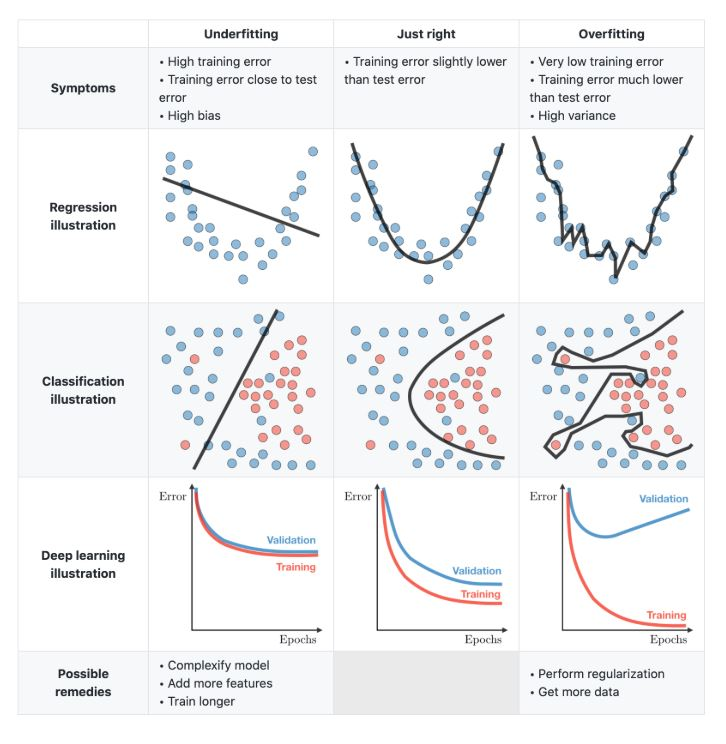


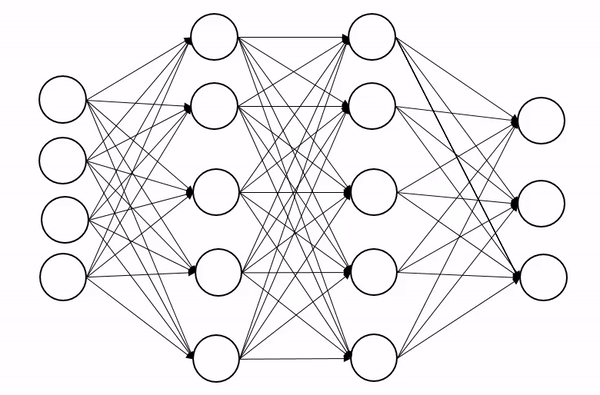

> **Dropout**

A technique where  neurons are “dropped out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass, and any weight updates are not applied to the neuron on the backward pass.

> **Complex co-adaptations**





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("/content/sonar_dataset.csv",header=None)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
85,0.0365,0.1632,0.1636,0.1421,0.1130,0.1306,0.2112,0.2268,0.2992,0.3735,...,0.0110,0.0071,0.0205,0.0164,0.0063,0.0078,0.0094,0.0110,0.0068,R
100,0.0629,0.1065,0.1526,0.1229,0.1437,0.1190,0.0884,0.0907,0.2107,0.3597,...,0.0089,0.0262,0.0108,0.0138,0.0187,0.0230,0.0057,0.0113,0.0131,M
86,0.0188,0.0370,0.0953,0.0824,0.0249,0.0488,0.1424,0.1972,0.1873,0.1806,...,0.0093,0.0033,0.0113,0.0030,0.0057,0.0090,0.0057,0.0068,0.0024,R
59,0.0125,0.0152,0.0218,0.0175,0.0362,0.0696,0.0873,0.0616,0.1252,0.1302,...,0.0041,0.0074,0.0030,0.0050,0.0048,0.0017,0.0041,0.0086,0.0058,R
91,0.0253,0.0808,0.0507,0.0244,0.1724,0.3823,0.3729,0.3583,0.3429,0.2197,...,0.0178,0.0073,0.0079,0.0038,0.0116,0.0033,0.0039,0.0081,0.0053,R


In [3]:
df.shape

(208, 61)

In [5]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [6]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')

In [7]:
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [35]:
X = df.drop(60, axis=1)
y = df[60]
X.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [10]:
y

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

# one hot encoding

In [46]:
y = pd.get_dummies(y, drop_first=True)

# Convert to integers explicitly
y = y.astype(int)

y.sample(5)
# R ---> 1  &  M ---> 0

,R
145,0
136,0
121,0
81,1
68,1


In [50]:
y.dtypes

R    int64
dtype: object

In [51]:
y.value_counts()

R
0    111
1     97
Name: count, dtype: int64

# Test Train Split

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=1)

In [37]:
X_train.shape, X_test.shape

((156, 60), (52, 60))

In [44]:
import tensorflow as tf
from tensorflow import keras

## without dropout

In [53]:
model = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
20/20 [==============================] - 1s 3ms/step - loss: 0.6894 - accuracy: 0.5321
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.5513
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5962
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6469 - accuracy: 0.6474
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6278 - accuracy: 0.7372
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6017 - accuracy: 0.7436
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5701 - accuracy: 0.7500
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5699 - accuracy: 0.7179
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5135 - accuracy: 0.7949
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.8013
Epoch 11/

In [54]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 1.1757 - accuracy: 0.7308


[1.1756833791732788, 0.7307692170143127]

In [55]:
y_pred = model.predict(X_test).reshape(-1)
print(y_pred[:10])

# round the values to nearest integer i.e. 0 or 1
y_pred = np.round(y_pred)
print(y_pred[:10])

2/2 [==============================] - 0s 6ms/step
[1.6517575e-07 9.6750706e-01 9.5353502e-01 5.0862272e-05 1.0000000e+00
 9.9664116e-01 4.0839169e-02 9.9999994e-01 4.3748136e-05 1.0000000e+00]
[0. 1. 1. 0. 1. 1. 0. 1. 0. 1.]


In [56]:
y_test[:10]

,R
186,0
155,0
165,0
200,0
58,1
34,1
151,0
18,1
202,0
62,1


In [59]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77        27
           1       0.79      0.60      0.68        25

    accuracy                           0.73        52
   macro avg       0.74      0.73      0.72        52
weighted avg       0.74      0.73      0.73        52



## With dropout layer

In [82]:
modeld = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

modeld.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

modeld.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
20/20 [==============================] - 3s 4ms/step - loss: 0.7638 - accuracy: 0.4808
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.7092 - accuracy: 0.5641
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6780 - accuracy: 0.5385
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.7175 - accuracy: 0.5128
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.5641
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.5705
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.7045 - accuracy: 0.4936
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6962 - accuracy: 0.4936
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.5192
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6860 - accuracy: 0.5449
Epoch 11/

In [83]:
modeld.evaluate(X_test, y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.4504 - accuracy: 0.7885


[0.4503880739212036, 0.7884615659713745]

In [84]:
y_predd = modeld.predict(X_test).reshape(-1)

# round the values to nearest integer i.e. 0 or 1
y_predd = np.round(y_predd)
print(y_predd[:10])

2/2 [==============================] - 0s 6ms/step
[0. 0. 1. 0. 1. 1. 0. 1. 0. 1.]


In [85]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_predd))

              precision    recall  f1-score   support

           0       0.72      0.96      0.83        27
           1       0.94      0.60      0.73        25

    accuracy                           0.79        52
   macro avg       0.83      0.78      0.78        52
weighted avg       0.83      0.79      0.78        52

